In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass
import scipy.signal as scs

In [2]:
ip = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(list(ip.columns))
ip.head()

['Data', 'Hora', 'Data / Hora', 'UmidadeRelativa_0', 'PressaoAtmosferica_0', 'Temperatura do Ar_0', 'TemperaturaInterna_0', 'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0', 'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0', 'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'Temperatura do Ar_1', 'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1', 'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1', 'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2', 'PressaoAtmosferica_2', 'Temperatura do Ar_2', 'TemperaturaInterna_2', 'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2', 'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2', 'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'Temperatura do Ar_3', 'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3', 'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento_3', 'Precipitacao_3', 'Local_3', 'UmidadeRelativa_4', 'PressaoAtmosferica_4', 'Temperatura do Ar_4', 'Tem

,Data,Hora,Data / Hora,UmidadeRelativa_0,PressaoAtmosferica_0,Temperatura do Ar_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,...,PressaoAtmosferica_4,Temperatura do Ar_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,31/12/11,23:46:34,31/12/11 23:46:34,94.2,916.9,18.9,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/12/11,23:30:32,31/12/11 23:30:32,94.3,917.0,18.8,22.4,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31/12/11,23:16:32,31/12/11 23:16:32,94.2,917.0,18.8,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31/12/11,23:00:32,31/12/11 23:00:32,94.2,917.1,18.7,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31/12/11,22:46:32,31/12/11 22:46:32,94.2,917.1,18.8,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um]
um.head()

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4
0,94.2,94.1,NaN,91.6,NaN
1,94.3,94.1,NaN,91.4,NaN
2,94.2,94.1,NaN,91.6,NaN
3,94.2,94.1,NaN,93.1,NaN
4,94.2,94.1,NaN,93.4,NaN


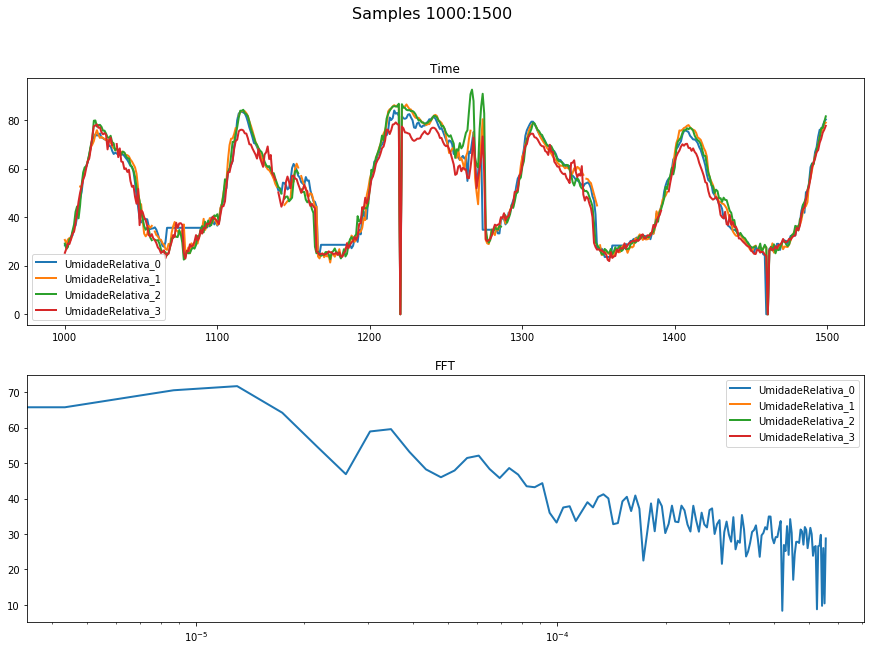

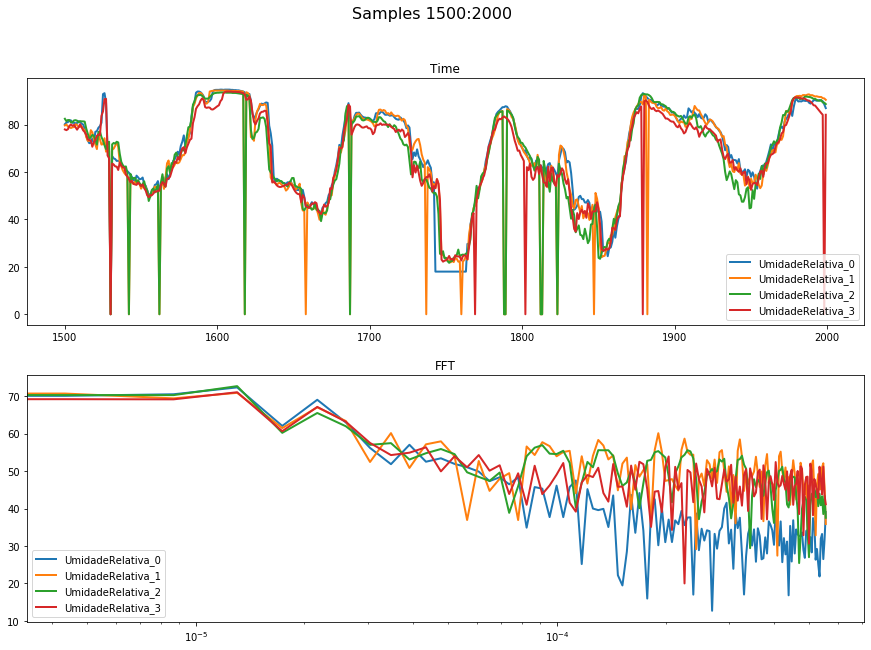

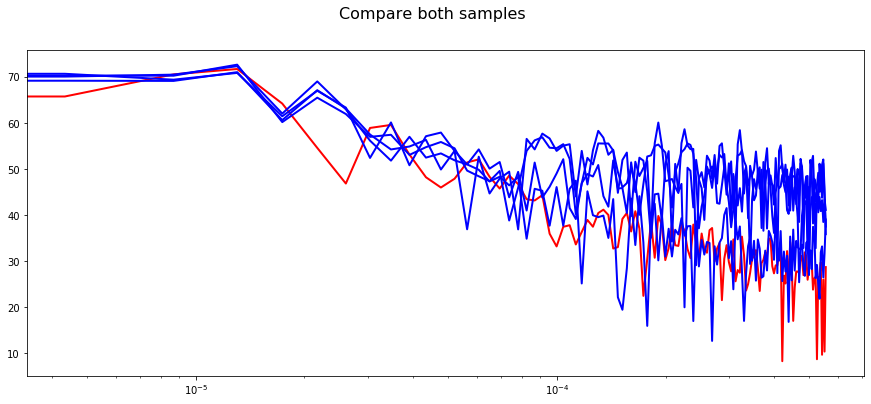

In [4]:
fig01, ax01 = plt.subplots(2, 1, figsize=(15,10))
fig02, ax02 = plt.subplots(2, 1,  figsize=(15,10))
fig03, axf= plt.subplots(1, 1,  figsize=(15,6))
fig03.suptitle(f'Compare both samples' , fontsize=16)

start =  1000
stop = 1500
fig01.suptitle(f'Samples {start}:{stop}' , fontsize=16)
ax01[0].set_title('Time')
ax01[1].set_title('FFT')
for col in cols_um[:-1]:
    data =  um.loc[:, col]
    freq_resp01 = np.abs(scs.spectrogram(data[start:stop], fs=1/(15*60), mode = 'magnitude', window = 'blackman'))
    ax01[0].plot(um[start:stop].index, data[start:stop], lw=2, label = col)
    ax01[1].semilogx(freq_resp01[0], 20*np.log10(freq_resp01[2][:,-1]), lw=2, label = col)
    ax01[0].legend()
    ax01[1].legend()
    
    axf.semilogx(freq_resp01[0], 20*np.log10(freq_resp01[2][:,-1]), lw=2, c='r')
    
start = 1500
stop  = 2000
fig02.suptitle(f'Samples {start}:{stop}' , fontsize=16)
ax02[0].set_title('Time')
ax02[1].set_title('FFT')
for col in cols_um[:-1]:
    data =  um.loc[:, col].fillna( value = 0)
    freq_resp01 = np.abs(scs.spectrogram(data[start:stop], fs=1/(15*60), mode = 'magnitude'))
    ax02[0].plot(um[start:stop].index, data[start:stop], lw=2, label = col)
    ax02[1].semilogx(freq_resp01[0], 20*np.log10(freq_resp01[2][:,-1]), lw=2, label = col)
    ax02[0].legend()
    ax02[1].legend()
    
    axf.semilogx(freq_resp01[0], 20*np.log10(freq_resp01[2][:,-1]), lw=2, c='b')

In [5]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    w = cutoff / (fs / 2) # Normalize the frequency
    b, a = butter(order, w, btype='low', analog=False)
    return filtfilt(b, a, data)

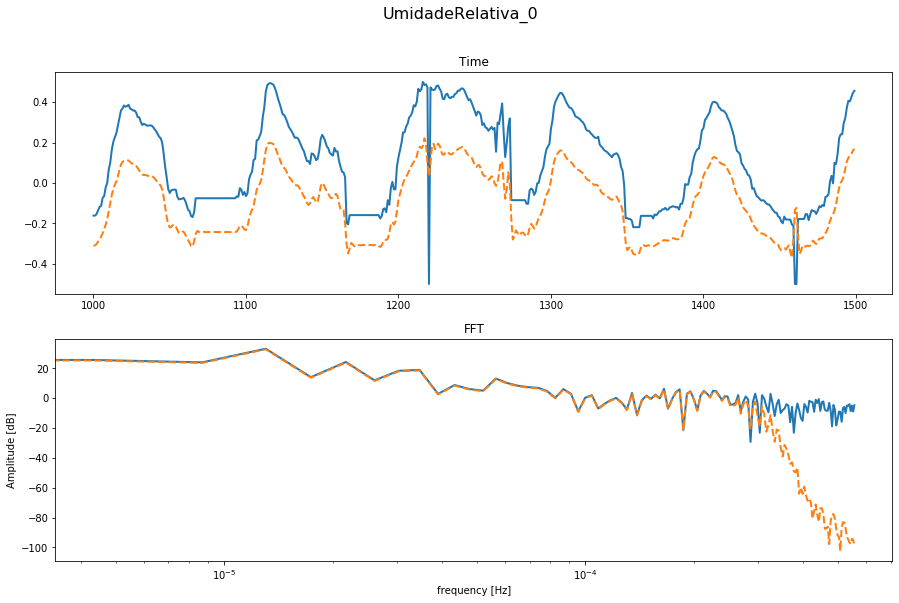

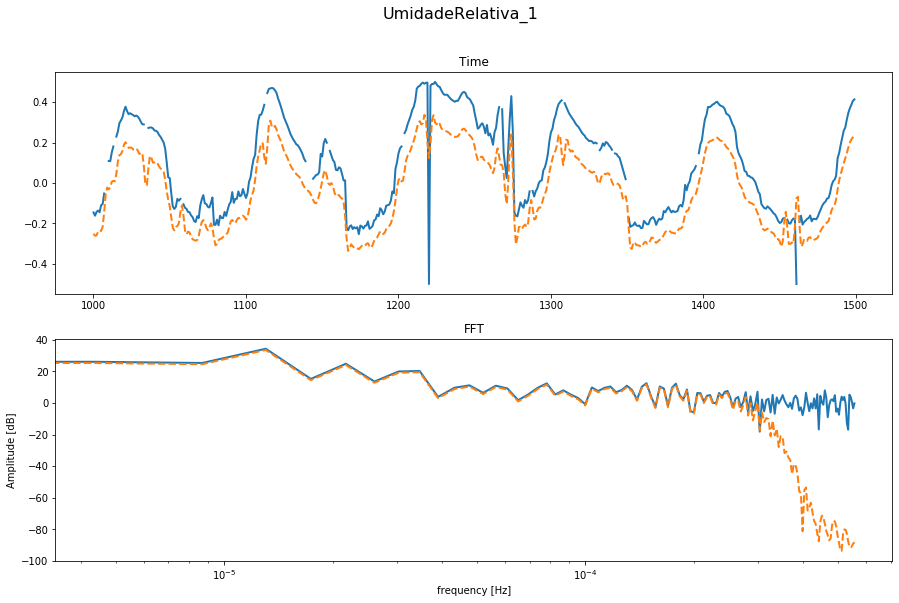

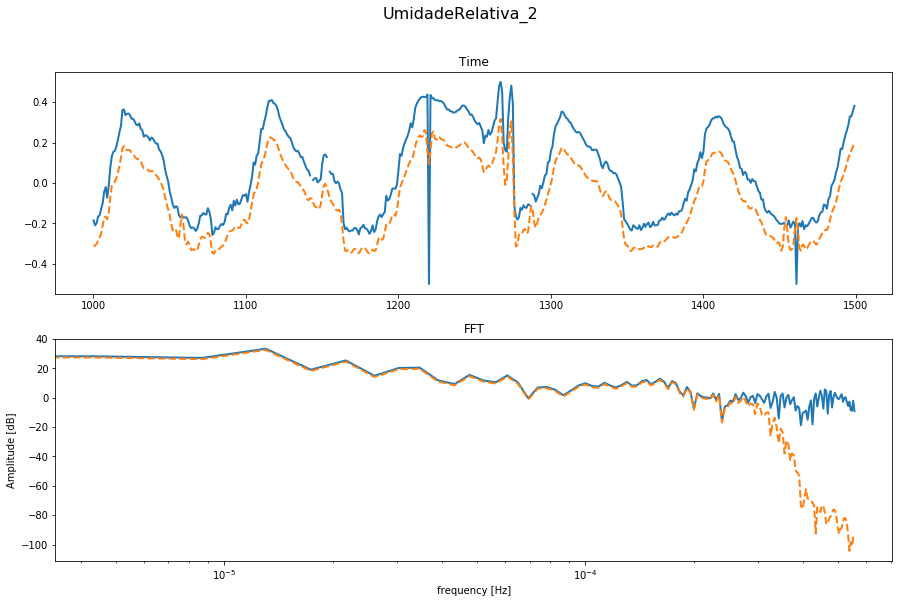

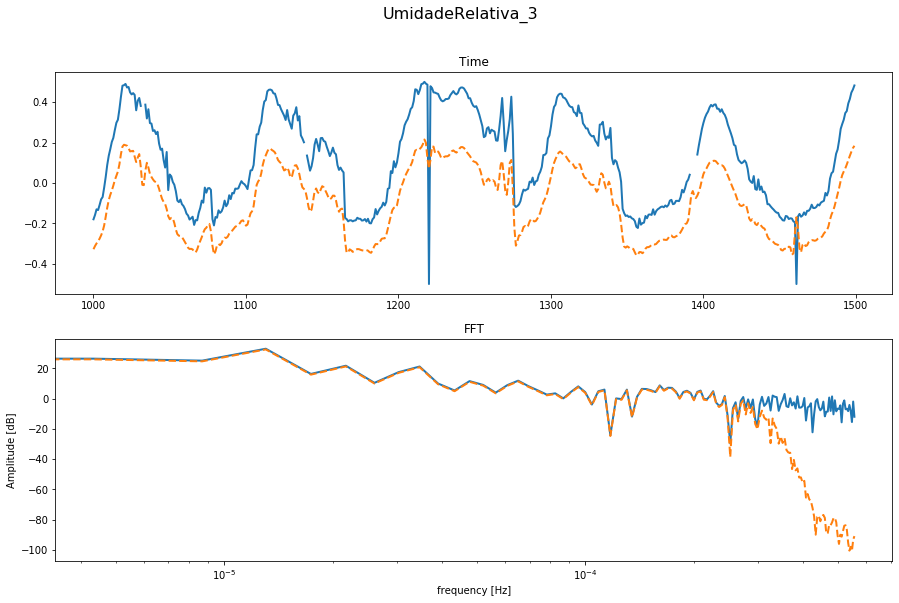

In [6]:
plottype = 'dB'
cutoff = 3e-4

fs = 1/(15*60)
start = 1000
stop  = 1500

for col in cols_um[:-1]:

    plot_data = um.loc[:, col][start:stop]
    plot_data_norm = (plot_data - plot_data.min() ) / (plot_data.max() - plot_data.min()) - 0.5

    data =  um.loc[:, col].replace({0:np.nan})
    data_norm = (data - data.min() ) / (data.max() - data.min()) - 0.5
    data_norm = data_norm.fillna(0)

    freq_resp = np.abs(scs.spectrogram(data_norm[start:stop], fs=1/(15*60), mode = 'magnitude'))
    
    f_data = butter_lowpass_filter(data_norm, cutoff, fs, order=5)
    f_data_norm = ( f_data - min(f_data) )/ (max(f_data) -
                                            min(f_data)) - 0.5
    f_freq_resp = np.abs(scs.spectrogram(f_data_norm[start:stop], fs = fs, mode = 'magnitude'))
    
    # PLOT
    fig, ax = plt.subplots(2, 1,  figsize=(15,9))
    fig.suptitle(f'{col}' , fontsize=16)
    ax[0].set_title('Time')
    ax[1].set_title('FFT')
    ax[0].plot(data_norm[start:stop].index, plot_data_norm, lw=2, label = col)
    ax[0].plot(data_norm[start:stop].index ,f_data_norm[start:stop], '--',  lw=2, label = col + 'f')
    if plottype == 'log':
        ax[1].plot(freq_resp[0],np.log10(freq_resp[2][:,-1]), lw=2, label = col + 'f')
        ax[1].plot(f_freq_resp[0], np.log10(f_freq_resp[2][:,-1]), '--', lw=2, label = col + 'f')
        ax[1].set_ylabel('Amplitude')
        
    elif plottype == 'dB':
        ax[1].semilogx(freq_resp[0],20*np.log10(freq_resp[2][:,-1]), lw=2, label = col + 'f')
        ax[1].semilogx(f_freq_resp[0], 20*np.log10(f_freq_resp[2][:,-1]), '--', lw=2, label = col + 'f')
        ax[1].set_ylabel('Amplitude [dB]')
    else:
        ax[1].plot(f_freq_resp[0], f_freq_resp[2][:,-1], lw=2, label = col + 'f')
        ax[1].plot(freq_resp[0], freq_resp[2][:,-1], lw=2, label = col)
        ax[1].set_ylabel('Amplitude')
    ax[1].set_xlabel('frequency [Hz]')
    plt.show()

###### Need to remove outliers!
Causing flat line on UmidadeRelativa_4
